### 测试增长率
#### 1. 读数据

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
# df=pd.read_csv("all.csv",index_col="开始日期")
df=pd.read_csv("all.csv")
df['开始日期']=pd.to_datetime(df['开始日期'].astype(str),format='%Y-%m-%d')
df['结束日期']=pd.to_datetime(df['结束日期'].astype(str),format='%Y-%m-%d')
df.set_index(df['开始日期'],inplace=True)
df

FileNotFoundError: [Errno 2] No usable temporary directory found in ['/var/folders/wd/snsb_m1d5cx4lb6s0klz1xgc0000gn/T/', '/tmp', '/var/tmp', '/usr/tmp', '/Users/sunlf/Documents/huigu-project/wife-app']

In [41]:
data=df[['搜索人数','买家数']]
# x=data['搜索人数']
x=data[['搜索人数']]
type(x)

pandas.core.frame.DataFrame

### 线性回归 -----》成交金额和买家数

In [7]:
target="成交金额"
param="买家数"
data=df[[param,target]]
x=data[[param]]
y=data[[target]]
# plt.scatter(df['买家数'],df['搜索人数'])
# data.corr()
lrModel = LinearRegression()
lrModel.fit(x,y)
lrModel.score(x,y)
# lrModel.predict([[60],[70]])
# lrModel.predict([[100000]])
print(lrModel.intercept_)
print(lrModel.coef_)
# y=1000000
# x=-96479.48433321+0.63269724*y
# x=1
# y=(x+96479.48433321)/0.63269724
# y
# print(x)
y=10
x=6396834.2134317+16.09016626*y
print(x)

[6396834.2134317]
[[16.09016626]]
6396995.1150943


In [45]:


#查看截距
alpha = lrModel.intercept_[0]

#查看参数
beta = lrModel.coef_[0][0]

print(alpha)
print(beta)

-96479.48433321348
0.632697240171686


,买家数,搜索人数
买家数,1.000000,0.964259
搜索人数,0.964259,1.000000


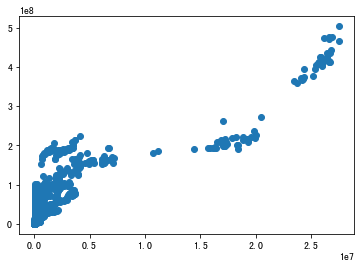

In [2]:
data=df[['买家数','搜索人数']]
data
plt.scatter(df['买家数'],df['成交金额'])
data.corr()

,成交金额,搜索人数
成交金额,1.000000,0.921741
搜索人数,0.921741,1.000000


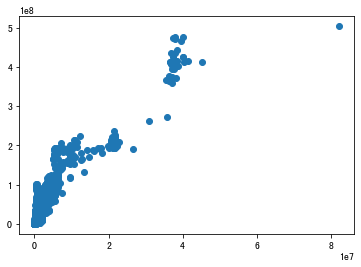

In [24]:
data=df[['成交金额','搜索人数']]
data
plt.scatter(df['搜索人数'],df['成交金额'])
data.corr()

In [ ]:
df['value']=df['买家数'].apply(lambda x : 1 if x>0 else 0)
df.loc[:,['买家数','成交金额']].values

In [ ]:
df.index

In [ ]:
df.dtypes

#### 业务指标1：月均消费次数
月均消费次数 = 总消费次数 / 月份数

In [ ]:
df.head()

In [ ]:
df.index.month.unique

In [ ]:
startTime=df.index.min()
 

In [ ]:
startTime=df.index.min()
endTime=df.index.max()
months=(endTime-startTime)//30
months=35

In [ ]:
df

In [ ]:
data=df.groupby(df.index)['成交金额'].agg(['sum','mean']).style.format("${0:,.2f}") 
# data=df.groupby(['类目名称']).sum() 
# data=df.groupby(["结束日期",'类目名称']).sum() 
# data['everyday']=data['成交金额'] 
data['sum']
# fig=plt.figure(figsize=(40,10))
# plt.plot(data['sum'])
# plt.plot(data['mean'])
# # data['everyday'].plot(kind='bar')

 

# plt.title('按天消费金额图')
# plt.xlabel('时间')
# plt.ylabel('成交金额')
# plt.legend(loc=0)
# # 保存图片
# # plt.savefig('C:\\Users\\Administrator\\Desktop\\day.png')
# # 显示图片
# plt.show()

In [ ]:
data=df.groupby(df.index)['成交金额'].agg(['sum','mean']).style.format("${0:,.2f}") 
# data=df.groupby(['类目名称']).sum() 
# data=df.groupby(["结束日期",'类目名称']).sum() 
data['everyday']=data['成交金额'] 
data
fig=plt.figure(figsize=(40,10))
plt.plot(data['everyday'])
# data['everyday'].plot(kind='bar')

 

plt.title('按天消费金额图')
plt.xlabel('时间')
plt.ylabel('成交金额')
plt.legend(loc=0)
# 保存图片
# plt.savefig('C:\\Users\\Administrator\\Desktop\\day.png')
# 显示图片
plt.show()

In [ ]:
# df.plot.bar()
# 画图
data=df.head(10)
fig=plt.figure(figsize=(40,10))
# plt.plot(df['成交金额'])
data['成交金额'].plot(kind='bar')

 
plt.legend(loc=0)
plt.title('按天消费金额图')
plt.xlabel('时间')
plt.ylabel('成交金额')
# 保存图片
# plt.savefig('C:\\Users\\Administrator\\Desktop\\day.png')
# 显示图片
plt.show()